<a href="https://colab.research.google.com/github/Yadukrishnan1/Customer-Success/blob/main/customer_success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Customer Succes Analysis for a Career Accelerator (Startup stage)**

---

An **online career accelerator** operates by helping prospective job seekers succesfully obtain a job in their industry role of choice. It is important for their business to determine if a new addition to their customers base could generate revenue by getting placed at the end of their service. This is also important to add reputation and to market their success.







1.  **Business Question**

What are the characteristic of a succesful(revenue generating) fellow (customer). How long do they take to guarantee the revenue (Time to get placed)?

2. **DS/ML Framing**

The first part of the question is a binary classification with two classes; 'placed' and 'not placed'. The second question is a regression problem.



# Importing all the required packages in Python

In [65]:
# Packages for EDA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
import time
import pickle

# Scikit-learn for ML prediction and modelling

from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.metrics import mean_squared_error, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from mpl_toolkits import mplot3d
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold, RandomizedSearchCV

from xgboost.sklearn import XGBRegressor, XGBClassifier
import xgboost as xgb

from os import path

warnings.filterwarnings('ignore')
%matplotlib inline

In [94]:
# Loading the data
cust_success=pd.read_excel('Data_Pathrise.xlsx')

# Exploratory Data Analysis

What are the variables (features) in our dataset? Which are the Predictor Variables and which is the Target Variables?

TV: 'placed'

PV: All others

Categorical variables such as 'program_duration_days', 'professional_experience', 'length_of_job_search' are ordinal attributes. All the rest of the categorical features are nominal attributes. One-hot-encoding is to be carried out for all the nominal attributes.

The testing set is selected by using the 'cust_success status' which are either 'Active' or 'Break'. The training set will be the Pathrise data without the testing set. A validation set should be made by doing a split of the training dataset.

Analysis should be two steps:

1) Determine what are the characteristics of fellows being placed. For that eliminate the 'program_duration_days' columns. Then see which columns contributes to it.

2) After determining the fellows, who get placed, use regression to see how long do they take to get placed.

# Other considerations

A) Check if balancing the training data set is needed.

B) Drop columns that seemingly have no effect such as 'id'. 'Race' and 'gender' might be affecting the prediction, but they are understandably complicated, so dropping them for training seems reasonable. 'placed' column should be removed in training as it's the target variable.

C) Anomaly detection needs to be studied. For example, limit the 'number of applications' to less than 200.

D) Do the encoders for categories in first cust_success data. Then add missing values with mean/median.




In [95]:
cust_success.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [96]:
cust_success.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [97]:
# Columns/feature names

cust_success.columns

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

In [98]:
# Missing values exploration

cust_success.isnull().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

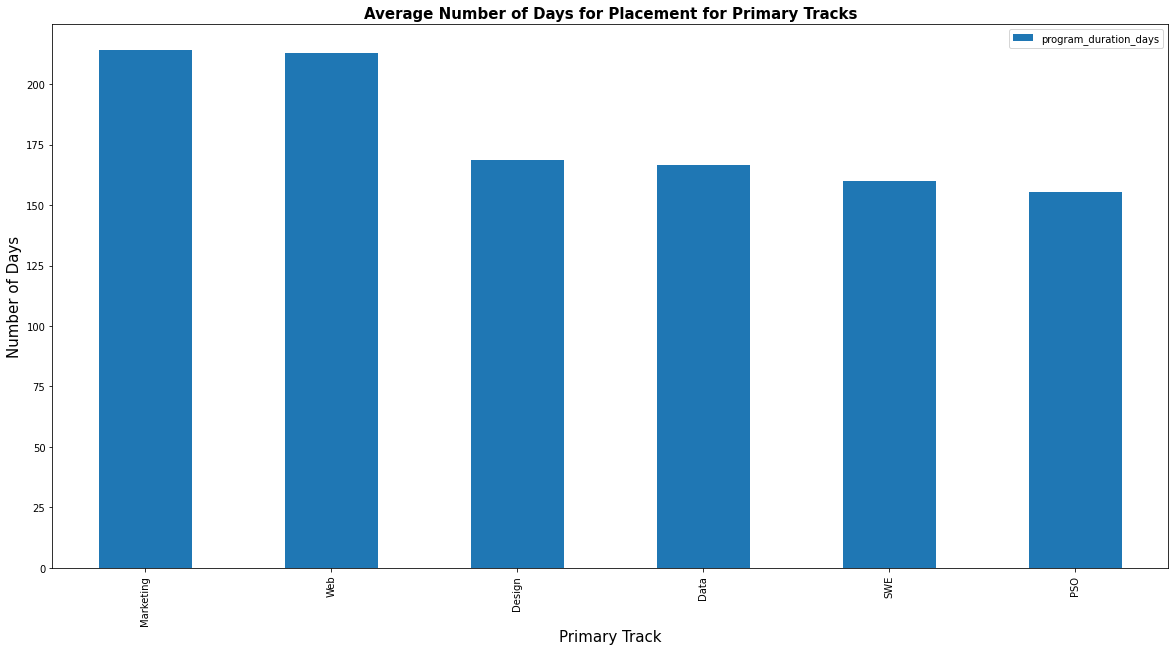

In [99]:
# Let's check the comparison for the "Average Number of Days for Placement" features as a function of the "tracks".
# Let's also keep cust_success as the original dataframe for a reference and use a generic name such as df for all the treatments.
df=cust_success

df_1 = df[df['placed'] == 1]
df_1.groupby('primary_track').agg({'program_duration_days':'mean'}).sort_values(by='program_duration_days', ascending=False).plot(kind='bar', figsize=(20,10))
plt.title ('Average Number of Days for Placement for Primary Tracks', fontsize=15, fontweight="bold")
plt.xlabel("Primary Track", fontsize=15)
plt.ylabel("Number of Days", fontsize=15)
plt.show()


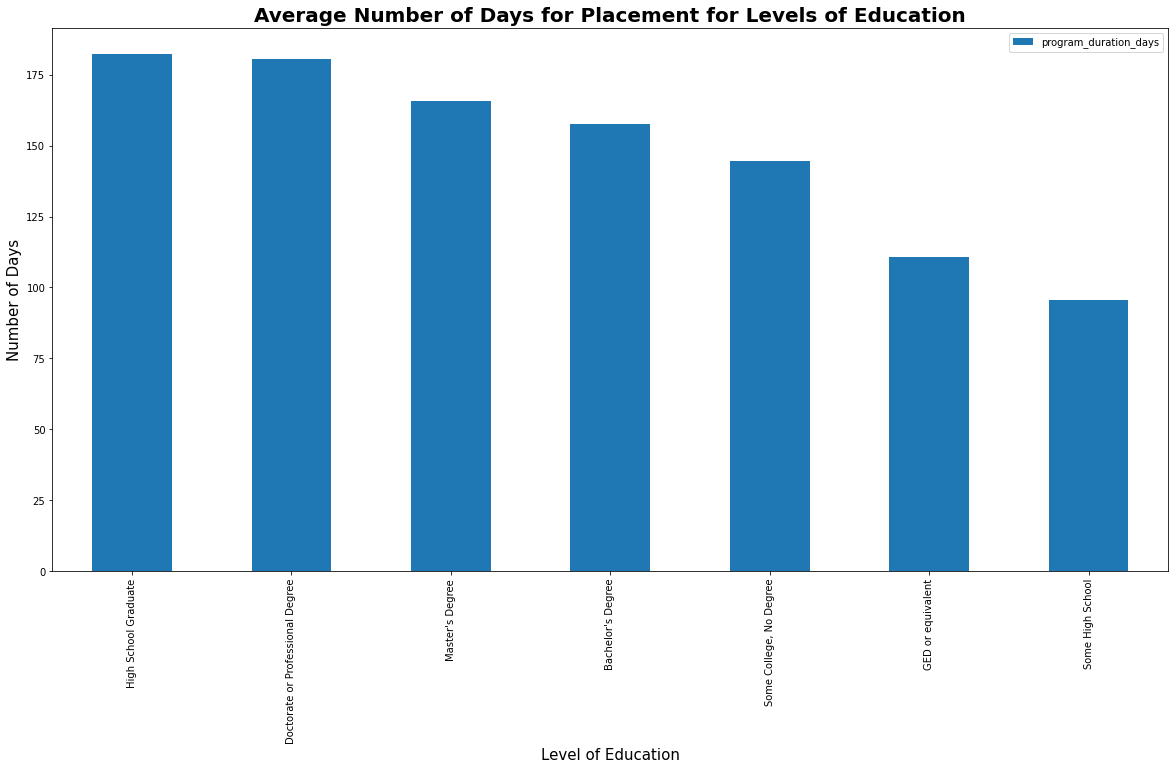

In [100]:
df_1 = df[df['placed'] == 1]
df_1.groupby('highest_level_of_education').agg({'program_duration_days':'mean'}).sort_values(by='program_duration_days', ascending=False).plot(kind='bar',figsize=(20,10))

plt.title ('Average Number of Days for Placement for Levels of Education', fontsize=20, fontweight="bold")
plt.xlabel("Level of Education", fontsize=15)
plt.ylabel("Number of Days", fontsize=15)
plt.show()

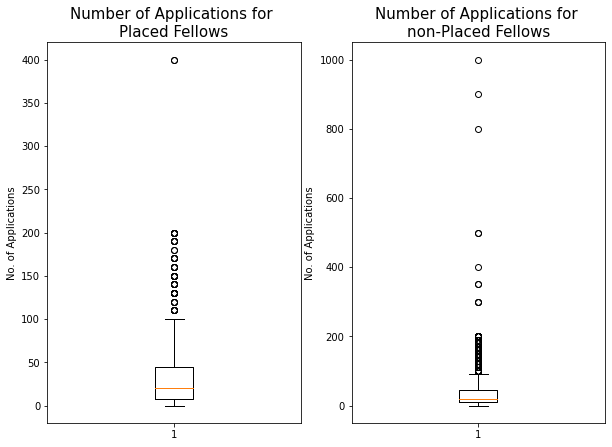

In [101]:
df_1 = df[df['placed'] == 1]
df_0 = df[df['placed'] == 0]

fig, ax = plt.subplots(1,2, figsize = (10, 7))
ax[0].set_title('Number of Applications for \nPlaced Fellows', fontsize = 15)
ax[0].boxplot(df_1['number_of_applications'])
ax[0].set_ylabel('No. of Applications')

ax[1].set_title('Number of Applications for \nnon-Placed Fellows', fontsize = 15)
ax[1].boxplot(df_0['number_of_applications'])
ax[1].set_ylabel('No. of Applications')
plt.show()

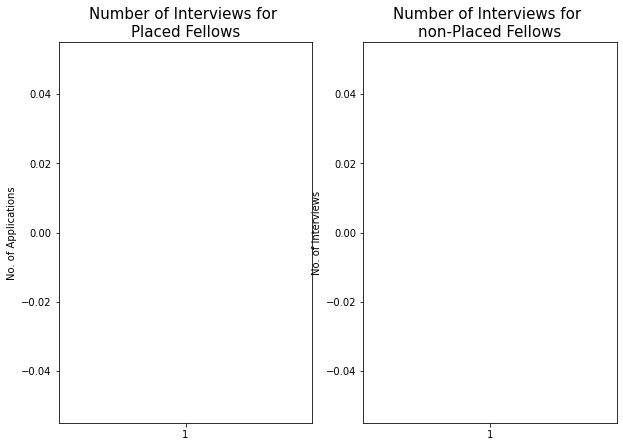

In [102]:
df_1 = df[df['placed'] == 1]
df_0 = df[df['placed'] == 0]

fig, ax = plt.subplots(1,2, figsize = (10, 7))
ax[0].set_title('Number of Interviews for \nPlaced Fellows', fontsize = 15)
ax[0].boxplot(df_1['number_of_interviews'])
ax[0].set_ylabel('No. of Applications')

ax[1].set_title('Number of Interviews for \nnon-Placed Fellows', fontsize = 15)
ax[1].boxplot(df_0['number_of_interviews'])
ax[1].set_ylabel('No. of Interviews')
plt.show()

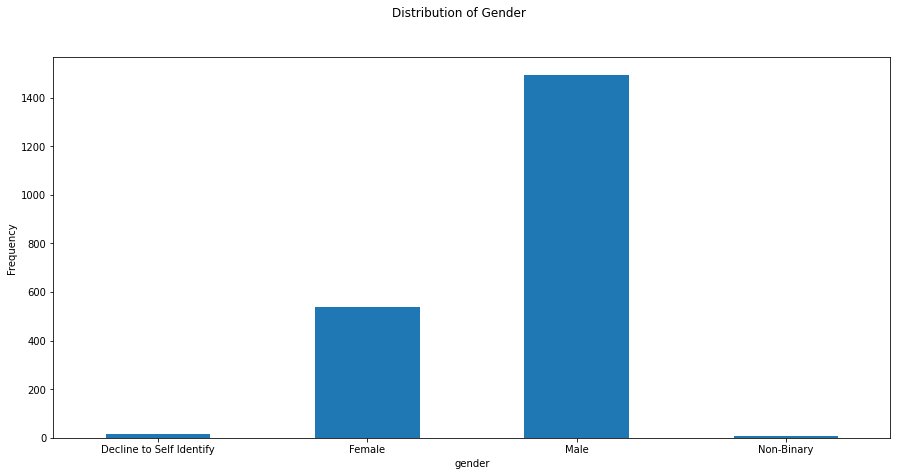

In [103]:
fig, ax = plt.subplots(figsize = (15, 7))
plt.suptitle('Distribution of Gender')
df.groupby('gender').size().to_frame().plot.bar(legend = False, ax = ax, rot = 0)
plt.ylabel('Frequency')
plt.show()

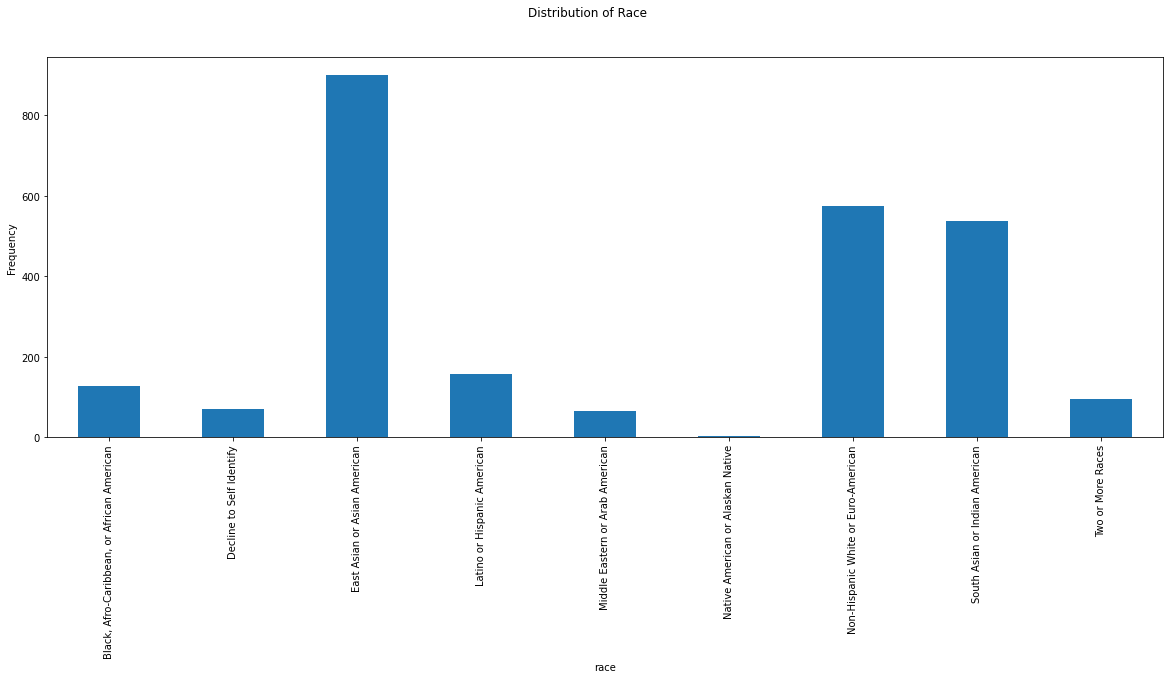

In [104]:
fig, ax = plt.subplots(figsize = (20, 7))
plt.suptitle('Distribution of Race')
df.groupby('race').size().to_frame().plot.bar(legend = False, ax = ax, rot = 90)
plt.ylabel('Frequency')
plt.show()

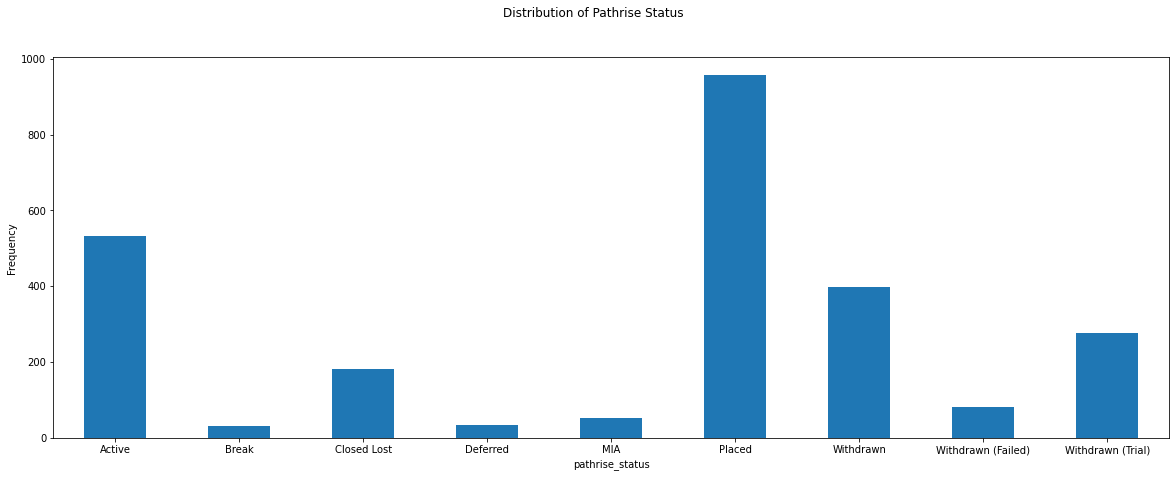

In [106]:

fig, ax = plt.subplots(figsize = (20, 7))
plt.suptitle('Distribution of Pathrise Status')
df.groupby('pathrise_status').size().to_frame().plot.bar(legend = False, ax = ax, rot = 0)
plt.ylabel('Frequency')
plt.show()

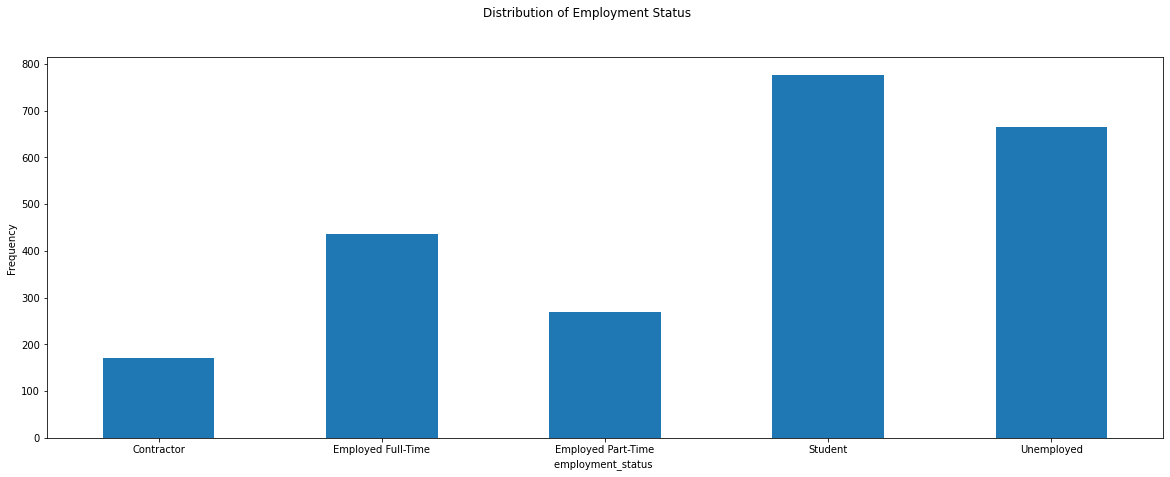

In [107]:
fig, ax = plt.subplots(figsize = (20, 7))
plt.suptitle('Distribution of Employment Status')
df.groupby('employment_status ').size().to_frame().plot.bar(legend = False, ax = ax, rot = 0)
plt.ylabel('Frequency')
plt.show()

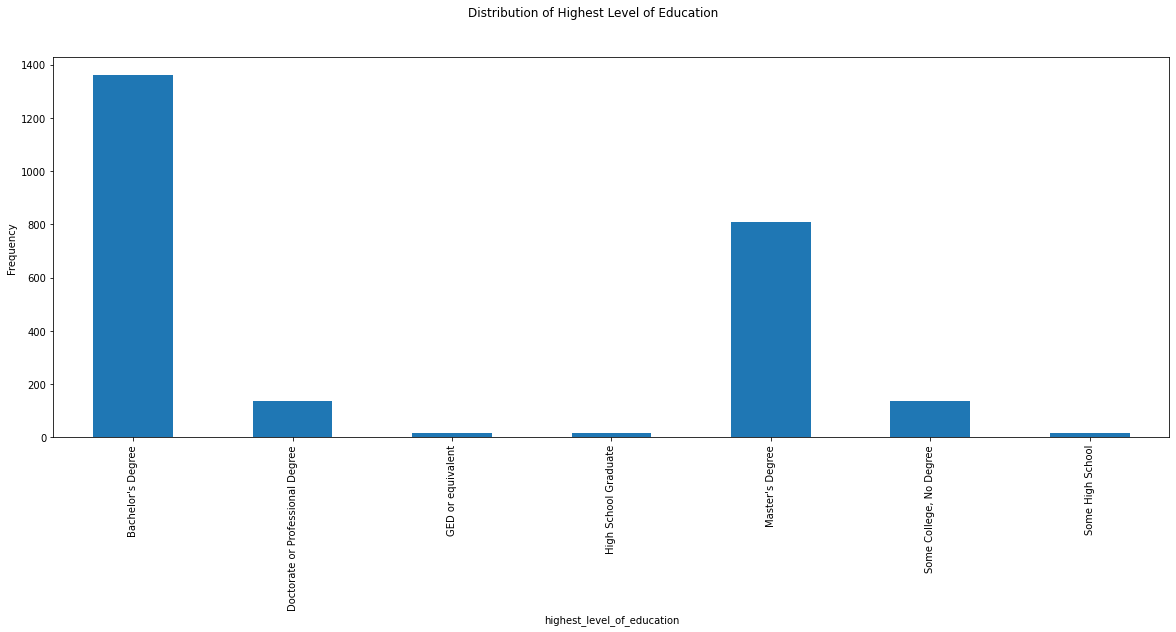

In [108]:
fig, ax = plt.subplots(figsize = (20, 7))
plt.suptitle('Distribution of Highest Level of Education')
df.groupby('highest_level_of_education').size().to_frame().plot.bar(legend = False, ax = ax, rot = 90)
plt.ylabel('Frequency')
plt.show()

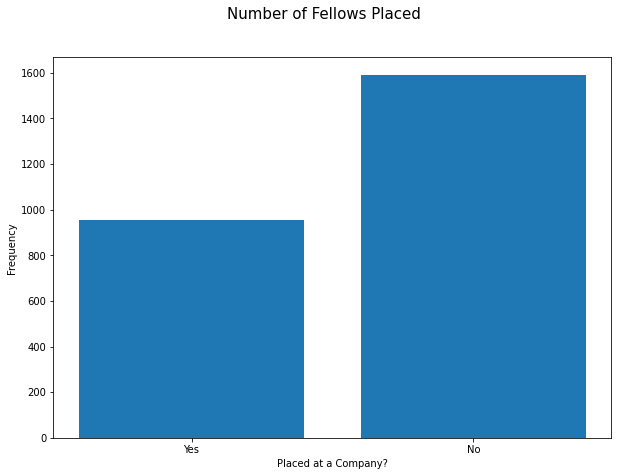

In [109]:
# Let's look at how many fellows placed at a company.
placed_df = pd.DataFrame({'Placed at a Company?': ['Yes', 'No'],'No. of Fellows': [df['placed'].sum(), df.shape[0] - df['placed'].sum()],
})
placed_df.set_index('Placed at a Company?', inplace = True)

fig, ax = plt.subplots(figsize = (10, 7))
fig.suptitle('Number of Fellows Placed', fontsize = 15)
plt.bar(x = placed_df.index, height = 'No. of Fellows', data = placed_df)
plt.xlabel('Placed at a Company?')
plt.ylabel('Frequency')
plt.show()

# In the first approach of model building and prediction, we drop all the missing values to see how the prediction goes. 

In [110]:
ori_len=df.shape[0]

# Need to drop rows containing NA for Categorical data
df = df[df['employment_status '].notna()]
df = df[df['highest_level_of_education'].notna()]
df = df[df['length_of_job_search'].notna()]
df = df[df['gender'].notna()]
df = df[df['race'].notna()]
df = df[df['work_authorization_status'].notna()]
df = df[df['biggest_challenge_in_search'].notna()]
df = df[df['cohort_tag'].notna()]
df = df[df['professional_experience'].notna()]

miss_len=df.shape[0]

print("We lose almost {0}% of data by dropping the missing values.".format(np.around((ori_len-miss_len)/ori_len*100)))

We lose almost 43.0% of data by dropping the missing values.


In [111]:
df.fillna(df.median(), inplace = True) # Median is more meaningful than mean in Skewed data

cat_df = df.select_dtypes(include=['object']).copy()

# Encoding the columns

enc_make = OrdinalEncoder()

cat_df_transformed = enc_make.fit_transform(cat_df)

# Adding converted labels to df

for i,j in enumerate(cat_df.columns):
  cat_df[j] = cat_df_transformed.transpose()[i]

df_1 = df.copy()
# Adding converted labels to df
for i in df_1.columns:
  if i in cat_df.columns:
    df_1[i] = cat_df[i]

df_1.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,0.0,4.0,39.0,102.0,0,4.0,0.0,1.0,5.0,1.0,0.0,2.0,900,2.0,6.0
1,2,0.0,3.0,20.0,102.0,0,4.0,5.0,1.0,2.0,0.0,1.0,6.0,0,2.0,6.0
2,3,2.0,1.0,7.0,0.0,0,2.0,4.0,3.0,1.0,3.0,1.0,0.0,0,2.0,2.0
3,4,2.0,3.0,7.0,0.0,0,0.0,0.0,3.0,2.0,3.0,1.0,5.0,25,2.0,1.0
4,5,5.0,4.0,6.0,89.0,1,4.0,0.0,0.0,5.0,0.0,3.0,10.0,100,2.0,2.0


In [122]:
from sklearn.cluster import KMeans,AgglomerativeClustering 
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

X = df_1.drop(columns = ['placed','pathrise_status', 'id'])
y = df_1['placed']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=6)
kmeans.fit(x_train)

pred = kmeans.predict(x_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.70      0.83      0.76       218
           1       0.63      0.46      0.53       142

    accuracy                           0.68       360
   macro avg       0.67      0.64      0.64       360
weighted avg       0.67      0.68      0.67       360



In [120]:
clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

pred = clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       218
           1       0.69      0.70      0.70       142

    accuracy                           0.76       360
   macro avg       0.75      0.75      0.75       360
weighted avg       0.76      0.76      0.76       360



In [115]:
# Making a parameter grid
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 3, 5, 7, 9],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [116]:
pred = grid.best_estimator_.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       218
           1       0.70      0.94      0.80       142

    accuracy                           0.82       360
   macro avg       0.83      0.84      0.82       360
weighted avg       0.85      0.82      0.82       360



# Dimensionality reduction using PCA

In [117]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = decomposition.PCA() #n_components=5
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [119]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Accuracy (in %): 0.7583333333333333
F1 score 0.7010309278350516
(0.6845637583892618, 0.7183098591549296, 0.7010309278350516, None)


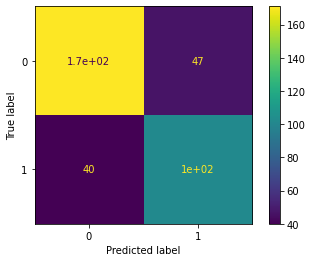

In [123]:
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import r2_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

print("Accuracy (in %):", clf.score(x_test, y_test))

y_pred = clf.predict(x_test)
print('F1 score', f1_score(y_test, y_pred))

plot_confusion_matrix(clf, x_test, y_test)
print(precision_recall_fscore_support(y_test, y_pred, average='binary'))

plt.show()

# Decision Tree model

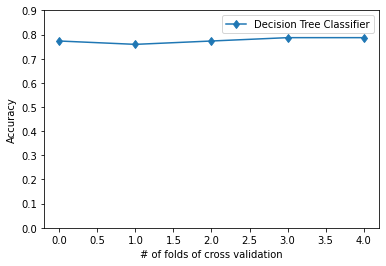

In [54]:
clf = DecisionTreeClassifier()
cv_score = cross_val_score(clf, 
                            x_train, y_train,
                            scoring = 'accuracy',
                            cv = 5,
                            n_jobs = -1,
                            verbose = 0)

plt.plot(cv_score, 'd-',label='Decision Tree Classifier')
plt.xlabel('# of folds of cross validation')
plt.ylabel('Accuracy')
plt.ylim(0,0.9)
plt.legend()

plt.show()

# Logistic regression model

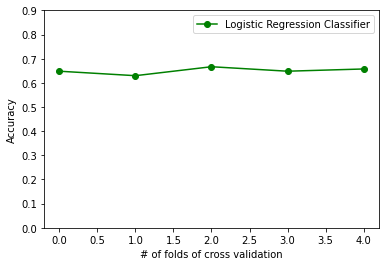

In [55]:
clf=LogisticRegression()
cv_score = cross_val_score(clf, 
                            x_train, y_train,
                            scoring = 'accuracy',
                            cv = 5,
                            n_jobs = -1,
                            verbose = 0)

plt.plot(cv_score, 'go-',label='Logistic Regression Classifier')
plt.xlabel('# of folds of cross validation')
plt.ylabel('Accuracy')
plt.ylim(0,0.9)
plt.legend()
plt.show()

# Random Forest Classifier

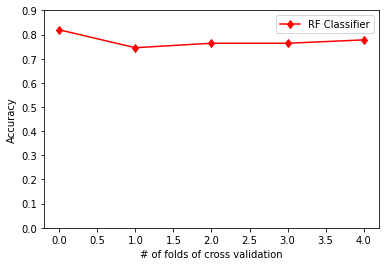

In [56]:
clf = RandomForestClassifier(n_estimators=40, random_state=0)
cv_score = cross_val_score(clf, 
                            x_train, y_train,
                            scoring = 'accuracy',
                            cv = 5,
                            n_jobs = -1,
                            verbose = 0)

plt.plot(cv_score, 'rd-',label='RF Classifier')
plt.xlabel('# of folds of cross validation')
plt.ylabel('Accuracy')
plt.ylim(0,0.9)
plt.legend()
plt.show()

# K-NN Classifier

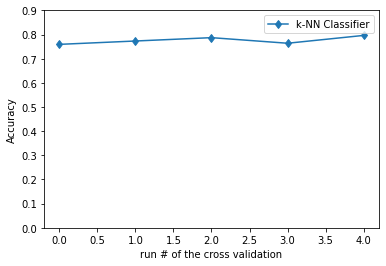

In [57]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=6)
cv_score = cross_val_score(clf, 
                            x_train, y_train,
                            scoring = 'accuracy',
                            cv = 5,
                            n_jobs = -1,
                            verbose = 0)

plt.plot(cv_score, 'd-',label='k-NN Classifier')
plt.xlabel('run # of the cross validation')
plt.ylabel('Accuracy')
plt.ylim(0,0.9)
plt.legend()
plt.show()

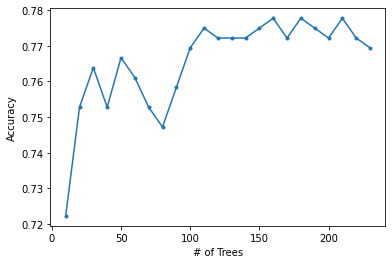

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accu=[]
for i in np.arange(10, 240, 10):
  classifier = RandomForestClassifier(n_estimators=i, random_state=0)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  accu.append(accuracy_score(y_test, y_pred))

plt.plot(np.arange(10, 240, 10), accu, '.-')
plt.xlabel('# of Trees')
plt.ylabel('Accuracy')
plt.show()

# Task - 2

## Determine how fast do fellows get placed

In [ ]:
# Removing the outliers in 'number_of_applications': 400 and 1000 applications are way above 95%.

cust_success_2=cust_success.drop(columns=['id', 'cohort_tag', 'professional_experience', 'length_of_job_search']) 
print('Before removing missing values, shape:', cust_success_2.shape)

cust_success_2.dropna(inplace=True)
print('After removing missing values, shape:', cust_success_2.shape)

Before removing missing values, shape: (2438, 14)
After removing missing values, shape: (1062, 14)


In [ ]:
cust_success_2_train=cust_success_2[(cust_success_2['cust_success_status']=='Placed') & (cust_success_2['placed']==1)].drop(columns=['cust_success_status', 'placed'])
cust_success_2_train.head()

,primary_track,program_duration_days,employment_status,highest_level_of_education,biggest_challenge_in_search,work_authorization_status,number_of_interviews,number_of_applications,gender,race,professional_experience_ord,length_of_job_search_ord
4,SWE,89.0,Unemployed,Bachelor's Degree,Hearing back on my applications,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,2.0,2.0
23,PSO,193.0,Unemployed,Master's Degree,Hearing back on my applications,Citizen,5.0,4,Male,Non-Hispanic White or Euro-American,2.0,4.0
30,SWE,73.0,Student,Master's Degree,Figuring out which jobs to apply for,F1 Visa/CPT,0.0,1,Male,East Asian or Asian American,2.0,1.0
54,SWE,76.0,Student,Master's Degree,Getting past final round interviews,F1 Visa/OPT,0.0,30,Female,East Asian or Asian American,3.0,1.0
63,SWE,65.0,Unemployed,Bachelor's Degree,Getting past phone screens,F1 Visa/OPT,0.0,0,Female,"Black, Afro-Caribbean, or African American",2.0,2.0


count    525.000000
mean     162.889524
std      103.029248
min        1.000000
25%       78.000000
50%      144.000000
75%      239.000000
max      548.000000
Name: program_duration_days, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


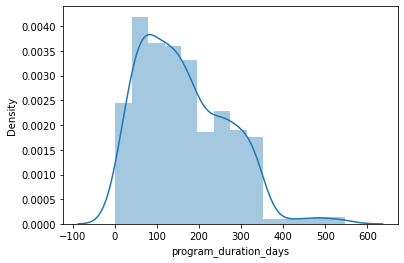

In [ ]:
# See the statistics of the target variable 

print(cust_success_2_train['program_duration_days'].describe())
sns.distplot(cust_success_2_train['program_duration_days'])
plt.show()

In [ ]:
# Check skewness and the curtosis

print("Skewness: %f" % cust_success_2_train['program_duration_days'].skew())
print("Kurtosis: %f" % cust_success_2_train['program_duration_days'].kurt())

Skewness: 0.714148
Kurtosis: 0.239682


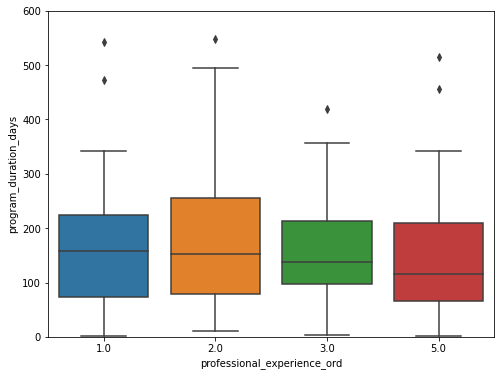

In [ ]:
# The most experienced gets placed faster.

var = 'professional_experience_ord'
data = pd.concat([cust_success_2_train['program_duration_days'], cust_success_2_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='program_duration_days', data=data)
fig.axis(ymin=0, ymax=600);

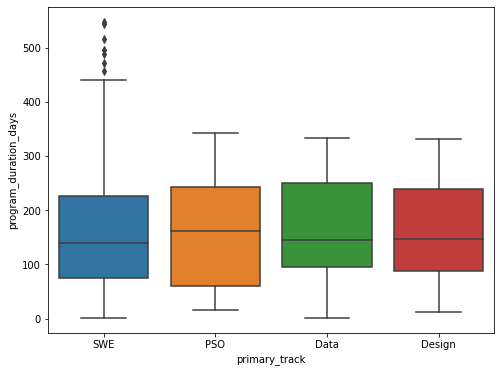

In [ ]:
# SWE has the lowest mean. Higher variance for PSO.

var = 'primary_track'
data = pd.concat([cust_success_2_train['program_duration_days'], cust_success_2_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='program_duration_days', data=data)


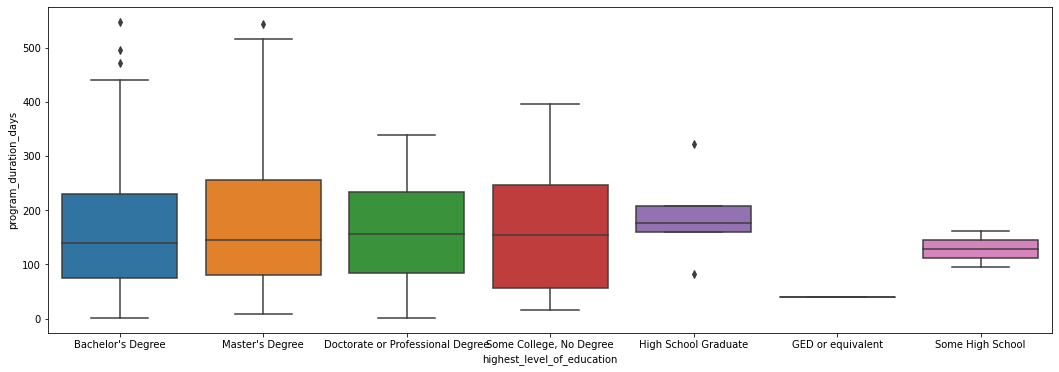

In [ ]:
# SWE has the lowest mean. Higher variance for PSO.

var = 'highest_level_of_education'
data = pd.concat([cust_success_2_train['program_duration_days'], cust_success_2_train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y='program_duration_days', data=data)


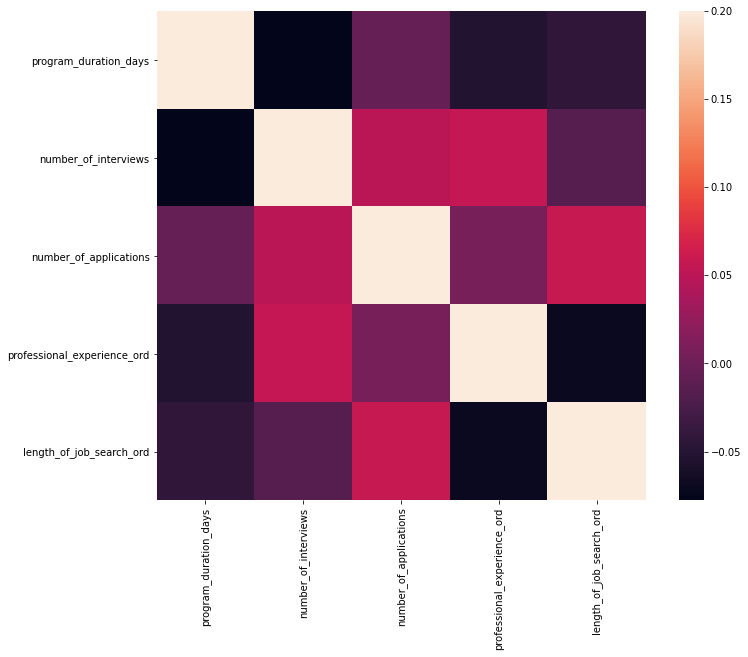

In [ ]:
#correlation matrix

corrmat = cust_success_2_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.2, square=True);

In [ ]:
cust_success_2_train.columns

Index(['primary_track', 'program_duration_days', 'employment_status',
       'highest_level_of_education', 'biggest_challenge_in_search',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race',
       'professional_experience_ord', 'length_of_job_search_ord'],
      dtype='object')

# Using One-Hot-Encoding in training set + Testing set


In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()

# 'work_authorization_status'
oe_results_work_author = oe_style.fit_transform(cust_success_2[['work_authorization_status']])
work_author=pd.DataFrame(oe_results_work_author.toarray(), columns=oe_style.categories_)
work_author.head()

,Canada Citizen,Citizen,F1 Visa/CPT,F1 Visa/OPT,Green Card,H1B,Not Authorized,Other,STEM OPT
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# 'biggest_challenge_in_search'

oe_results_big_challenge = oe_style.fit_transform(cust_success_2[['biggest_challenge_in_search']])
big_challenge=pd.DataFrame(oe_results_big_challenge.toarray(), columns=oe_style.categories_)
big_challenge.head()

,Behavioral interviewing,Figuring out which jobs to apply for,Getting past final round interviews,Getting past mid-stage interviews,Getting past phone screens,Hearing back on my applications,Lack of relevant experience,Resume gap,Technical interviewing,Technical skills
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 'employment_status'
oe_results_employ_stat = oe_style.fit_transform(cust_success_2[['employment_status']])
employ_stat=pd.DataFrame(oe_results_employ_stat.toarray(), columns=oe_style.categories_)
employ_stat.head()

,Contractor,Employed Full-Time,Employed Part-Time,Student,Unemployed
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [ ]:
# 'primary_track'
oe_results_primary_track = oe_style.fit_transform(cust_success_2[['primary_track']])
primary_track=pd.DataFrame(oe_results_primary_track.toarray(), columns=oe_style.categories_)
primary_track.head()

,Data,Design,PSO,SWE,Web
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [ ]:
# 'highest_level_of_education'
oe_results_education = oe_style.fit_transform(cust_success_2[['highest_level_of_education']])
education=pd.DataFrame(oe_results_education.toarray(), columns=oe_style.categories_)
education.head()

,Bachelor's Degree,Doctorate or Professional Degree,GED or equivalent,High School Graduate,Master's Degree,"Some College, No Degree",Some High School
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# 'race'
oe_results_education = oe_style.fit_transform(cust_success_2[['race']])
race=pd.DataFrame(oe_results_education.toarray(), columns=oe_style.categories_)
race.head()

,"Black, Afro-Caribbean, or African American",Decline to Self Identify,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 'gender'
oe_results_gender = oe_style.fit_transform(cust_success_2[['gender']])
gender=pd.DataFrame(oe_results_gender.toarray(), columns=oe_style.categories_)
gender=gender.drop(columns=['Decline to Self Identify'])
gender.head()

,Female,Male,Non-Binary
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [ ]:
cust_success_2_ready=cust_success_2.reset_index(drop=True, inplace=False)
cust_success_2_ready=cust_success_2_ready.join(education).join(big_challenge).join(employ_stat).join(primary_track).join(work_author) #.join(race).join(gender)
cust_success_2_ready=cust_success_2_ready.drop(columns=['highest_level_of_education', 'primary_track', 'employment_status', 'biggest_challenge_in_search', 'work_authorization_status', 'race', 'gender']) #, 'number_of_applications'

cust_success_2_ready

,pathrise_status,program_duration_days,placed,number_of_interviews,number_of_applications,professional_experience_ord,length_of_job_search_ord,"(Bachelor's Degree,)","(Doctorate or Professional Degree,)","(GED or equivalent,)","(High School Graduate,)","(Master's Degree,)","(Some College, No Degree,)","(Some High School,)","(Behavioral interviewing,)","(Figuring out which jobs to apply for,)","(Getting past final round interviews,)","(Getting past mid-stage interviews,)","(Getting past phone screens,)","(Hearing back on my applications,)","(Lack of relevant experience,)","(Resume gap,)","(Technical interviewing,)","(Technical skills,)","(Contractor,)","(Employed Full-Time,)","(Employed Part-Time,)","(Student,)","(Unemployed,)","(Data,)","(Design,)","(PSO,)","(SWE,)","(Web,)","(Canada Citizen,)","(Citizen,)","(F1 Visa/CPT,)","(F1 Visa/OPT,)","(Green Card,)","(H1B,)","(Not Authorized,)","(Other,)","(STEM OPT,)"
0,Closed Lost,0.0,0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Closed Lost,0.0,0,5.0,25,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Placed,89.0,1,10.0,100,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Closed Lost,0.0,0,5.0,100,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Closed Lost,0.0,0,0.0,9,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,Withdrawn (Trial),9.0,0,4.0,15,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1058,Placed,119.0,1,0.0,10,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1059,Withdrawn,118.0,0,1.0,25,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1060,Withdrawn (Failed),457.0,0,4.0,15,5.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Training set is all the fellows who got placed. The we will split it into a validation set for testing.
cust_success_2_train=cust_success_2_ready[(cust_success_2_ready['cust_success_status']=='Placed') & (cust_success_2_ready['placed']==1)].drop(columns=['cust_success_status', 'placed'])


# Training and testing data for Task - 2

In [ ]:
X_train2=cust_success_2_train.drop(columns='program_duration_days')
y_train2=cust_success_2_train['program_duration_days']

# We use 'train_test_split' from Sckit_learn to create a training and validation datasets.

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = 0.2, random_state = 0)

# Dimensionality reduction using PCA

In [ ]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = decomposition.PCA()
pca.fit(X_train2)
X_train2 = pca.transform(X_train2)
X_test2 = pca.transform(X_test2)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)

X_test2 = sc.transform(X_test2)

# Linear regression model

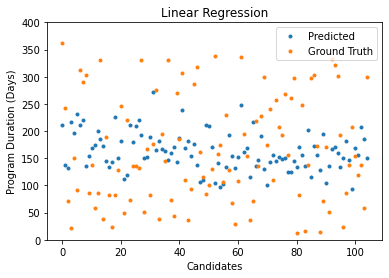

0.10680280949543008


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train2, y_train2)
y_pred2 = reg.predict(X_test2)

plt.plot(np.array(y_pred2),'.', label='Predicted')
plt.plot(np.array(y_test2),'.', label='Ground Truth')
plt.xlabel('Candidates')
plt.ylabel('Program Duration (Days)')
plt.title('Linear Regression')
plt.legend()
plt.ylim(0,400)
plt.show()

print(reg.score(X_train2, y_train2))

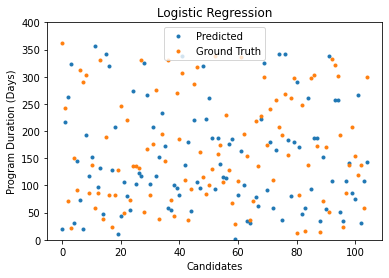

0.8357142857142857


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=500).fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)

plt.plot(np.array(y_pred2),'.', label='Predicted')
plt.plot(np.array(y_test2),'.', label='Ground Truth')
plt.xlabel('Candidates')
plt.ylabel('Program Duration (Days)')
plt.title('Logistic Regression')
plt.legend()
plt.ylim(0,400)
plt.show()

print(clf.score(X_train2, y_train2))

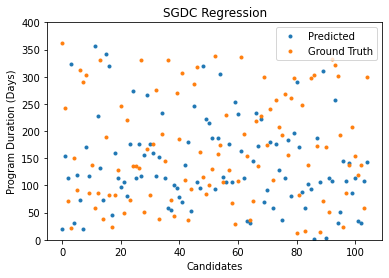

0.7333333333333333


In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train2, y_train2)

y_pred2=clf.predict((X_test2))

plt.plot(np.array(y_pred2),'.', label='Predicted')
plt.plot(np.array(y_test2),'.', label='Ground Truth')
plt.xlabel('Candidates')
plt.ylabel('Program Duration (Days)')
plt.title('SGDC Regression')
plt.legend()
plt.ylim(0,400)
plt.show()

print(clf.score(X_train2, y_train2))